In [1]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_test.shape)

(10000, 28, 28)


In [6]:
%matplotlib inline

C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


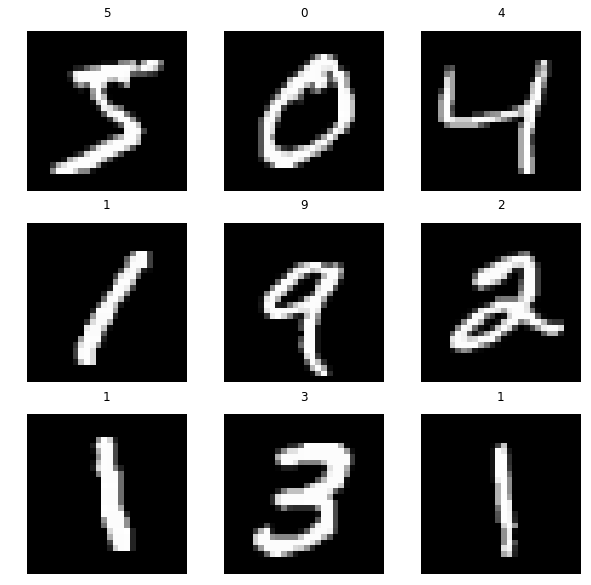

In [7]:
fig,axs = plt.subplots(3,3,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axs.flat):
    ax.axis('off')
    ax.matshow(x_train[i])
    ax.set_title(y_train[i])
    
fig.show()
    

In [8]:
x = x_train.reshape(len(x_train),-1)
y = y_train

In [9]:
print(x.shape)

(60000, 784)


In [10]:
x = x.astype(float)/255.


In [11]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_train))
kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(x)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [12]:
kmeans.labels_

array([2, 4, 7, ..., 3, 6, 8])

In [13]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
    

In [14]:
cluster_labels = infer_cluster_labels(kmeans,y)

In [15]:
print(cluster_labels)

{1: [0], 6: [1, 6], 3: [2, 5], 7: [3], 0: [4, 9], 4: [7], 2: [8]}


In [16]:
predicted_labels = infer_data_labels(kmeans.predict(x),cluster_labels)

In [17]:
print(predicted_labels[:20])
print(y[:20])

[3 0 4 2 7 2 1 3 1 6 3 1 3 6 1 7 2 2 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [18]:
from sklearn import metrics

def calculate(estimator,data,labels):
    print("Number of clusters:{}".format(estimator.n_clusters))
    print("Intertia:{}".format(estimator.inertia_))
    print("Homogenity:{}".format(metrics.homogeneity_score(labels,estimator.labels_)))
    

In [19]:
clusters = [10,16,36,64,144,256]


for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(x)
    
    calculate(estimator,x,y)
    cluster_labels = infer_cluster_labels(estimator,y)
    predicted = infer_data_labels(estimator.labels_,cluster_labels)
    
    print("Accuracy:{}".format(metrics.accuracy_score(y,predicted)))

Number of clusters:10
Intertia:2368380.7385273916
Homogenity:0.4676372956146156
Accuracy:0.5612833333333334
Number of clusters:16
Intertia:2224671.390263005
Homogenity:0.5647215270848905
Accuracy:0.6566833333333333
Number of clusters:36
Intertia:1959946.6044074781
Homogenity:0.675594275624347
Accuracy:0.7473166666666666
Number of clusters:64
Intertia:1824291.9092305466
Homogenity:0.7306829453049217
Accuracy:0.8002166666666667
Number of clusters:144
Intertia:1632601.1283710813
Homogenity:0.8072825352819625
Accuracy:0.8723666666666666
Number of clusters:256
Intertia:1521779.406055952
Homogenity:0.8329233336856696
Accuracy:0.8880333333333333


In [20]:
x_test = x_test.reshape(len(x_test),-1)
x_test = x_test.astype(float)/255.

clusters = [256,300,512,724,1024,2048]


kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(x)
cluster_labels = infer_cluster_labels(kmeans,y)
predictions = kmeans.predict(x_test)
predicted_labels = infer_data_labels(predictions,cluster_labels)
    
print("Testing accuracy{}".format(metrics.accuracy_score(y_test,predicted_labels)))

Testing accuracy0.8963


C:\Users\Dhruv\Downloads\WPy-3662\python-3.6.6.amd64\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


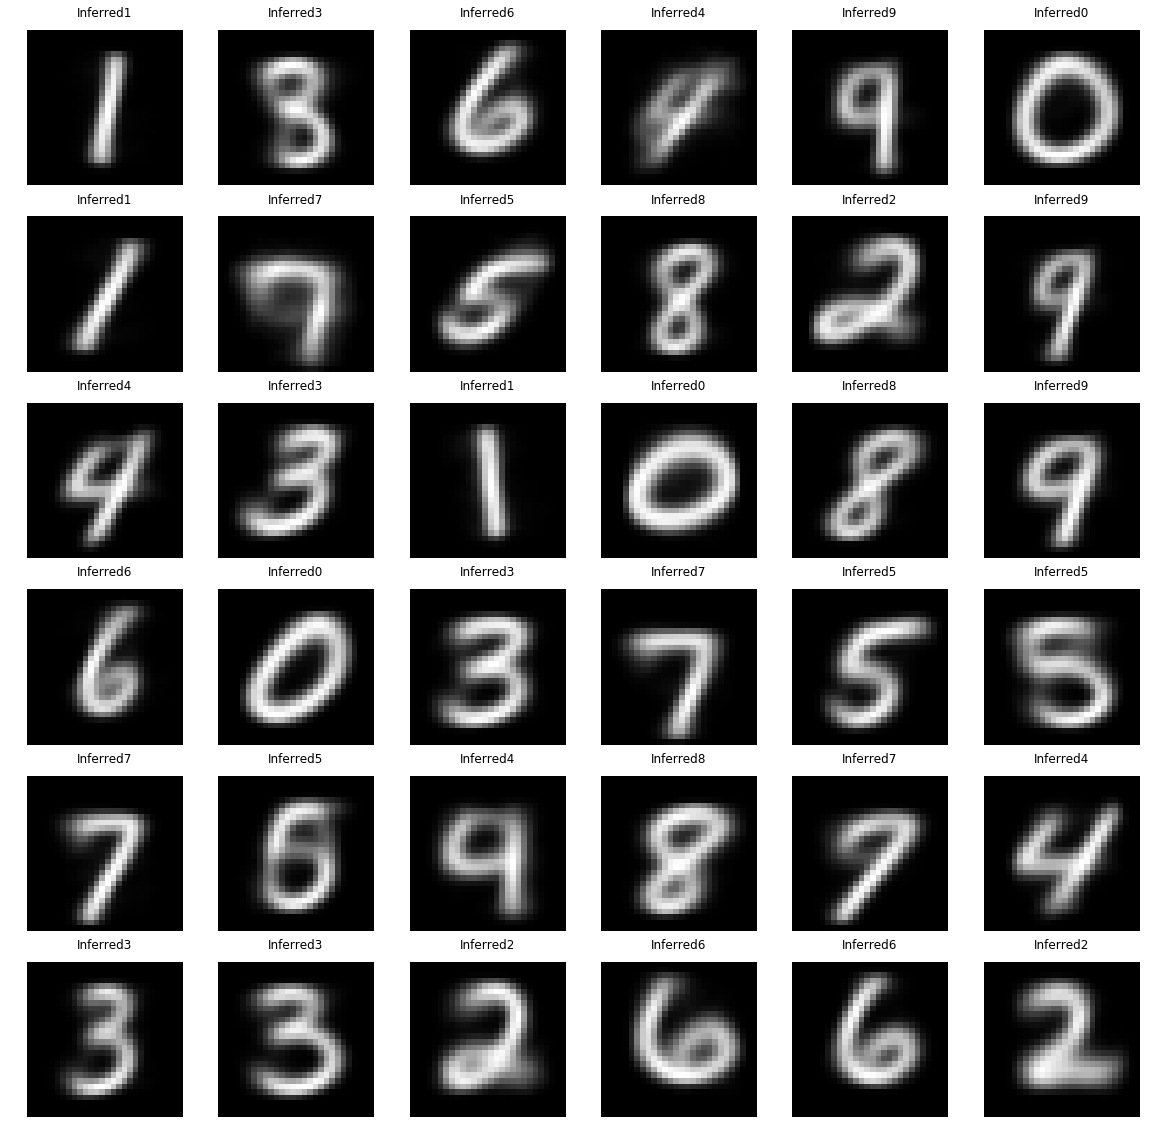

In [22]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(x)

centroids = kmeans.cluster_centers_

images = centroids.reshape(36,28,28)
images*=255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans,y)
fig,axs = plt.subplots(6,6,figsize=(20,20))
plt.gray()

for i,ax in enumerate(axs.flat):
    for key,value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred{}'.format(key))
            
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show()
